<center>

### COSC2753 - Machine Learning

# **Data Processing & Feature Engineering**

<center>────────────────────────────</center>
&nbsp;


# I. Introduction

Machine learning algorithms rely heavily on the quality of the data they are trained on. This section delves into the critical steps of data processing and feature engineering that prepare data for optimal performance in machine learning models.

Here, we will explore techniques for:

- **Feature Representation:** Ensuring features are understood by the model. This includes methods for encoding categorical features and scaling numerical features into appropriate formats.
- **Feature Selection:** Identifying the most relevant features. We will discuss techniques to select the features that contribute most effectively to the prediction task at hand.
- **Data Cleaning:** Maintaining data integrity. This section covers methods for detecting and handling outliers that could potentially mislead the model.
- **Feature Interpretation:** Understanding feature relationships. We will use statistical tests like ANOVA and Chi-Square to analyze the relationships between features and the target variable.
- **Model Regularization:** Preventing overfitting. We will discuss techniques for reducing model complexity and improving its ability to generalize to unseen data.

<em><sub>─────── End Of Section ───────</sub></em>


# II. Project Initialization

## 1. Global Configuration

In [17]:
# Import necessary packages
import pandas as pd  # Data manipulation
import numpy as np  # Linear algebra
import seaborn as sns  # Visualization
import matplotlib  # Plotting
import sklearn  # Machine learning
import tabulate  # Pretty printing
import sys  # System specific parameters and functions
import importlib  # Importing modules
import statsmodels  # Statistical models
import imblearn  # Imbalanced learning

# Reload modules
sys.path.append("../../")  # Root directory
modules_to_reload = [
    "scripts.outlier_detector",
    "scripts.styler",
    "scripts.neko",
    "scripts.utils",
]

# Reload modules if they have been modified
missing_modules = []

for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])
    else:
        missing_modules.append(module_name)

# Recache missing modules
if missing_modules:
    print(f"Modules {missing_modules} not found. \nRecaching...")

# Import user-defined scripts
from scripts.styler import Styler
from scripts.neko import Neko
from scripts.utils import Utils
from scripts.outlier_detector import OutlierDetector


# Initialize styler
styler = Styler()  # Text Styler

# Check package versions
styler.draw_box("Checking Package Versions...")

try:
    with open("../../requirements.txt", "r") as file:
        requirements = file.readlines()
except FileNotFoundError:
    print(f"File '../../requirements.txt' not found.")

packages_to_check = [np, pd, sns, matplotlib, tabulate, sklearn, statsmodels, imblearn]

for package in packages_to_check:
    Utils.version_check(package, requirements=requirements)

styled_text = styler.style(
    "\nDone checking packages version...\n", bold=True, italic=True
)
print(styled_text)

# Initialize objects
styler.draw_box("Initializing Project...")
neko = Neko()  # Panda extension
bullet = ">>>"  # Bullet point
plt = matplotlib.pyplot  # Matplotlib

# Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.precision", 3)

styled_text = styler.style("Done initializing project...", bold=True, italic=True)
print(styled_text)

┌────────────────────────────────┐
│  Checking Package Versions...  │
└────────────────────────────────┘
>>> numpy is up to date: 1.26.4
>>> pandas is up to date: 2.2.1
>>> seaborn is up to date: 0.13.2
>>> matplotlib is up to date: 3.8.3
>>> tabulate is up to date: 0.9.0
>>> sklearn is up to date: 1.4.1.post1
>>> statsmodels is up to date: 0.14.1
>>> imblearn is up to date: 0.12.2

Done checking packages version...

┌───────────────────────────┐
│  Initializing Project...  │
└───────────────────────────┘

    /\_____/\
   /  x   o  \
  ( ==  ^  == )       Neko has arrived!
   )         (        An data visualizing extension for analyzing DataFrames.
  (           )       Art: https://www.asciiart.eu/animals/cats.
 ( (  )   (  ) )
(__(__)___(__)__)

Done initializing project...


## 2. Data Loading

In [15]:
try:
    # Load the training dataset
    df_train = pd.read_csv("../../data/cleaned/data_train_cleaned.csv")

    # Draw a box for dataset overview
    styler.draw_box("Dataset Overview")

    # Get data essence
    print(neko.essense(df_train))

    # One hot encode the categorical columns
    categorical_columns = ["GenHlth", "Age", "Education", "Income"]
    df_train = pd.get_dummies(df_train, columns=categorical_columns, drop_first=True)

except Exception as e:
    # Handle Exception
    print(f"Error: {str(e)}")

┌────────────────────┐
│  Dataset Overview  │
└────────────────────┘
╭────┬─────────────────────────────┬────────────────╮
│    │ Attribute                   │ Value          │
├────┼─────────────────────────────┼────────────────┤
│  0 │ Number of Rows              │ 202736         │
├────┼─────────────────────────────┼────────────────┤
│  1 │ Number of Columns           │ 24             │
├────┼─────────────────────────────┼────────────────┤
│  2 │ Data Types                  │ int64, float64 │
├────┼─────────────────────────────┼────────────────┤
│  3 │ Total Missing Values        │ 0              │
├────┼─────────────────────────────┼────────────────┤
│  4 │ Columns with Missing Values │ []             │
├────┼─────────────────────────────┼────────────────┤
│  5 │ Number of Duplicates        │ 136            │
├────┼─────────────────────────────┼────────────────┤
│  6 │ Memory Usage (MB)           │ 37.1           │
╰────┴─────────────────────────────┴────────────────╯


In [21]:
df_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Sex,ExtraMedTest,ExtraAlcoholTest,Status,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13,Education_2,Education_3,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,0,0,1,24,1,0,0,1,0,1,0,1,0,0,0,0,0,60.0,0.000,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,0,0,0,0.0,-64.000,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,0,0,1,36,1,0,0,1,1,0,0,1,1,30,30,1,0,-46.0,0.000,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0,1,1,35,0,0,0,1,1,1,0,1,0,0,0,0,0,-83.0,-7.566,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,0,1,1,27,0,0,0,1,0,1,0,1,0,0,0,0,0,-58.0,0.000,0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


# III. Data Sampling

┌───────────────────────────────────────┐
│  Target Variable Before Oversampling  │
└───────────────────────────────────────┘


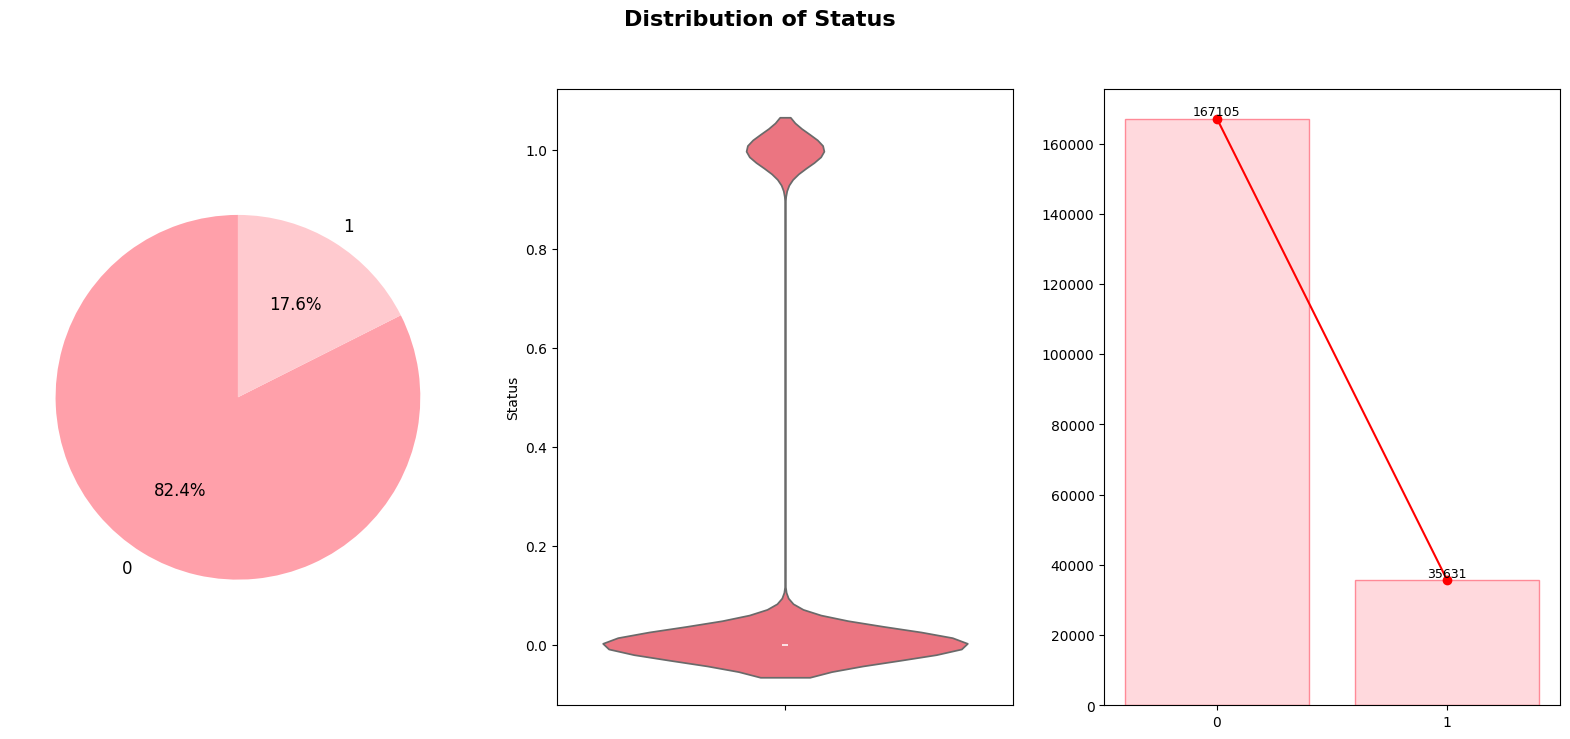

<Figure size 640x480 with 0 Axes>

┌──────────────────────────────────────┐
│  Target Variable After Oversampling  │
└──────────────────────────────────────┘


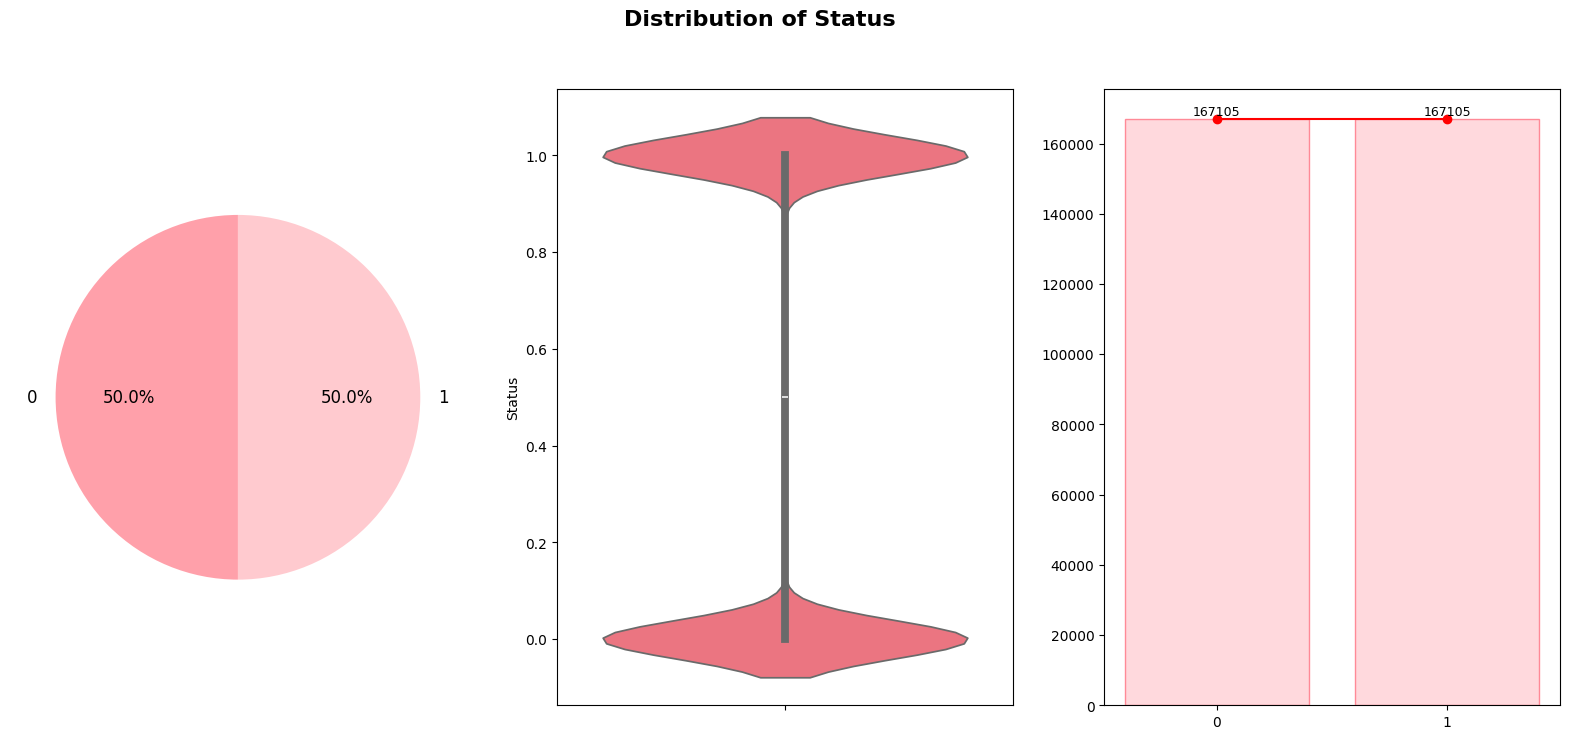

<Figure size 640x480 with 0 Axes>

In [12]:
# Target variable before oversampling
styler.draw_box("Target Variable Before Oversampling")
neko.data_frequency(column_name="Status", data=df_train)

# Perform oversampling on the training data
df_train_over = neko.over_sampling(df_train, "Status", "random")

# Target variable after oversampling
styler.draw_box("Target Variable After Oversampling")
neko.data_frequency(column_name="Status", data=df_train_over)

# Save the oversampled data
df_train = df_train_over.copy()

In [13]:
# Save the sampled dataset
try:
    df_train.to_csv("../../data/processed/data_train_processed.csv", index=False)
    text = "Dataset has been saved successfully"
except Exception as e:
    text = f"Error occurred while saving dataset: {str(e)}"

# Display saving result
styler.draw_box("Dataset Saving")
styled_text = styler.style(text, bold=True, italic=True)
print(f"{bullet} {styled_text}")

┌──────────────────┐
│  Dataset Saving  │
└──────────────────┘
>>> Dataset has been saved successfully


# IV. Feature Engineering